# Assignment 5

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [1271]:
NAME = "Zachary Schmitt"
STUDENT_ID = "1574482"

## Question 1: GRU/LSTM

We've seen both LSTM and GRU cells as building blocks for RNNs.

Here is a reminder of each of their corresponding architectures:

![Pic](https://drive.google.com/uc?id=1INZQkDev_8rdFxOT9hfAiPWJRT6-N82S)

### Question 1.i) What are the major differences between each?



LSTM: 3 gates and a candidate/memory unit. 

GRU: less total gates than an LSTM. No cell state to tansfer information between cells, but has a hidden state insead, has an Update gate that decides which information to throw away and which to add. While the reset gate is used to decide how much previous information is used. Less operations per gate mean GRUs are faster than LSTMs


### Question 1.ii) What are the major advantages of each?

  

LSTM has the advantage of processing long sequences of data by remembering previous computations and applying them across diffent timesteps. This often solves the vanilla RNN's problem of vanishing gradient. LSTMs are considered a  "many-to-many" type of RNN as a result of these advantages.  

A GRU is a variety of a LSTM and therefore benifits from teh advantages states above, however with fewer gates in a GRU, the processing is often much faster. This leads to an advantage in real time language translation and video proccessing. 

### Question 1.iii) What are the major disadvantages of each?

LSTMs are more complex. LSTMs are also slower. LSTMs are not as acurate on smaller datasets since tehy cannot benifit as well from remembering information.

GRUs "remember" less data and therefore are not quite as useful on larger datasets.

## Question 2: United States Corona Virus Cases Forecast

### Question 2.i) Import data and get data for United States
We will be using a subset of Corona Virus dataset available at [Kaggle.com](https://www.kaggle.com/). The dataset is rather comprehensive so for our predictions we will use the number of cases in the United States from the 1 January 2020 (when this record starts) to 14 July 2020 (the last time this dataset was updated). The numbers of cases is cumulative. \\

You may want to switch to GPU in "Runtime"->"Change Runtime type" for this assignment.

** Note: The full data set is available at https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed_US.csv

In [1272]:
# Import and get data
import numpy as np
import pandas as pd
!wget "https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv"

--2020-07-26 21:02:48--  https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv
Resolving people.ucsc.edu (people.ucsc.edu)... 128.114.119.88
Connecting to people.ucsc.edu (people.ucsc.edu)|128.114.119.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178638 (174K) [text/csv]
Saving to: ‘time_series_covid_19_confirmed.csv.41’

time_series_covid_1 100%[===================>] 174.45K  --.-KB/s    in 0.1s    

2020-07-26 21:02:48 (1.42 MB/s) - ‘time_series_covid_19_confirmed.csv.41’ saved [178638/178638]



In [1273]:
# Load data
dataframe = pd.read_csv("time_series_covid_19_confirmed.csv")

Let's look at the data

In [1274]:
dataframe.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541


This data set is somewhat scattered. Some of rows represent an entire country's case data while some country's case data is split up into province. But we want to extract US case data.

In [1275]:
# Extract US corona data and drop province/state - Long.
US_dataframe = dataframe[dataframe['Country/Region'] == 'US']
US_dataframe.head()
US_dataframe = US_dataframe.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [1276]:
US_dataframe.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


Now we have a case dataframe containing the US case numbers ranging from 22 January 2020 to 14 July 2020. However, lets only consider the data from 2 March 2020 when the total number of Corona virus cases in the US exceeded 50,000.

In [1277]:
# Cut off first 40 days of data
US_dataframe = US_dataframe.iloc[:, 40:]
US_dataframe.shape

(1, 135)

In [1278]:
US_dataframe.head()

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,53,73,104,174,222,337,451,519,711,1109,1561,2157,2870,2968,4360,6141,8917,14157,19479,25825,33761,43850,54112,66055,84091,102276,122069,141205,162707,188724,214205,244610,276547,309699,337573,367215,397992,429686,464442,497943,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


#### Question 2.i.a) Plot the cases for the US 
Using seaborn.lineplot, Plot the cases in the US in a Number of Cases vs. Day plot.
**Hint: you may need np.linspace to create an x-axis. You will also need to cast US_dataframe into an np.array using US_dataframe.values. You will likely need to call reshape ino order to transform the new np.array into shape (135,)

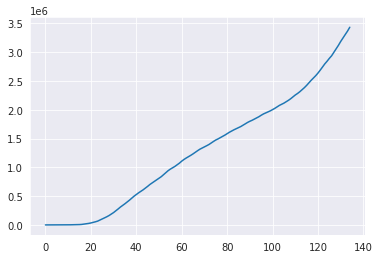

In [1279]:
import matplotlib.pyplot as plt
import seaborn as sns

# YOUR CODE HERE
import numpy as np

sns.set_style("darkgrid")
plt.plot(np.squeeze(np.asarray(US_dataframe)))
plt.show()

#### Question 2.i.b) Analyzing the plot
If you plotted the data correctly, it looks like there are some slight trends in the plot. Recalling that the data starts on 22nd of January, describe some of the trends that you may see. When did cases start to raise dramatically? Did the total number of cases ever seem to stop growing? Add approximate dates.

The data plot shows that the case number stayed at zero for the first 20 days. Then in mid February tthe case number started to raise linearly. Not until day 110(late March) did the case numbers begin to raise dramatically. It also appears that the case number growth is continuous throughout the 140 day timespan. 

### Question 2.ii) Analyzing the plot
As an aside, disease spread often occur on an exponential scale. Therefore, we will analyze the data in the logarithmic scale. We'll apply the np.log function to the dataframe below then plot the transformed data.

In [1280]:
# Apply natural log to the US_dataframe
df = US_dataframe.apply(np.log)

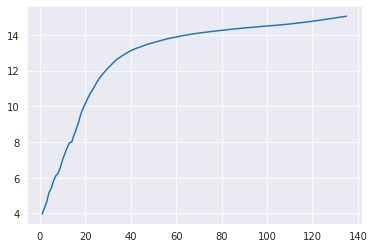

In [1281]:
import seaborn as sns
sns.lineplot(x = np.linspace(1,135,135), y = df.values.reshape(-1))

The plot above shows that on a logarithmic scale, the cumulative number of cases began to level off around days 20-30 but towards day 120 we see that the growth in the number of cases has begun to tick upwards again. Now we will do our time series prediction on the US_dataframe.

#### Question 2.iii.a) Apply MinMaxScaler to US_dataframe
Recall [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn. Use it to scale the data for our analysis. 
** Hint: You will need to call .transpose inorder to comply with required inputshape (n,1)

In [1282]:
from sklearn.preprocessing import MinMaxScaler
# YOUR CODE HERE
scaler = MinMaxScaler()
US_data = scaler.fit_transform(US_dataframe.T)

#### Question 2.iii.b) Split data into train and test for time series prediction
We will begin by splitting US_dataframe into train and test data. Begin with split = 0.7.

In [1283]:
# Use this function to create train/test split
def train_test_split(arr: np.array, split = 0.90):
    train_size = int(len(arr) * split)
    test_size = len(arr) - train_size
    US_train, US_test = arr[0:train_size,:], arr[train_size:len(arr),:]
    print("train.shape: ", US_train.shape)
    print("test.shape: ", US_test.shape)
    return (US_train, US_test)

In [1284]:
# Call train_test_split on US_data
train, test = train_test_split(US_data)

train.shape:  (121, 1)
test.shape:  (14, 1)


Now we create the dataset time_step determines how many days back the model will look to generate a new prediction. Begin with time_step=2

In [1285]:
# Generate a dataset where X[n] contains the readings for the 'time_step' previous days 
# and y contains the reading for today.
def create_dataset(dataset, time_steps=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_steps-1):
		a = dataset[i:(i+time_steps), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_steps, 0])
	return np.array(dataX), np.array(dataY)

In [1286]:
# Choose the number of time steps that the model "looks back"
time_steps = 5# YOUR CODE HERE

# Create your training dataset.
X_train, y_train = create_dataset(train, time_steps) # YOUR CODE HERE
## Create your test dataset.
X_test, y_test = create_dataset(test, time_steps)# YOUR CODE HERE

In [1287]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#### Question 2.iii.c) LSTM Architecture
Next build the LSTM model. We don't have a lot of data so build the model with:
<ul>
<li>Input Layer shape of size (1,time_steps)</li>
<li>An LSTM Laywer with 10 units</li>
<li>Dense Layer with 1 neuron</li>

Then use 'mean_squared_error' loss with an optimizer. Run model.summary(), compile, then fit the model. Train for 100 epochs using X_train, y_train, validation_split = 0.2


In [1288]:
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Embedding 
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *

# Build model architecture here
# YOUR CODE HERE

model = Sequential()
model.add(LSTM(10,return_sequences=False, activation='relu', input_shape=(1,time_steps),kernel_regularizer=l2(0.0001)))
model.add(Dense(1, activation='relu'))


# Compile model
# YOUR CODE HERE
opt = RMSprop(lr = 0.007)
model.compile(optimizer=opt, loss = 'mse', metrics=['accuracy'])


# Model summary
model.summary()
# YOUR CODE HERE

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 10)                640       
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 11        
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


In [1289]:
# Fit model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)# YOUR CODE HERE

Train on 92 samples, validate on 23 samples
Epoch 1/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.0000e+00 - val_loss: 0.1247 - val_accuracy: 0.0000e+00
Epoch 2/100
92/92 [==============================] - 0s 235us/step - loss: 0.0194 - accuracy: 0.0000e+00 - val_loss: 0.0483 - val_accuracy: 0.0000e+00
Epoch 3/100
92/92 [==============================] - 0s 198us/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 4/100
92/92 [==============================] - 0s 195us/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 5/100
92/92 [==============================] - 0s 195us/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 6/100
92/92 [==============================] - 0s 198us/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 7/100
92/92 [==============================] -

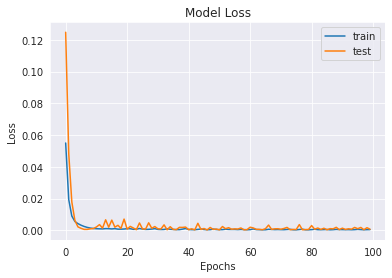

In [1290]:
# Plot the Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# YOUR CODE HERE

Lets look at our predictions

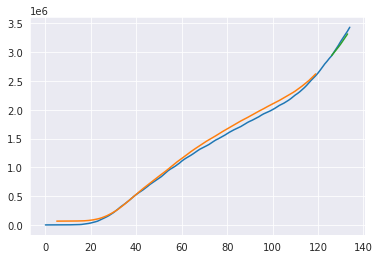

In [1291]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_train])

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(US_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(US_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(US_data)-1, :] = testPredict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(US_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The Blue line is the real number of cases. the Orange line is the train_predicted number of cases, and the green line is the test_predicted number of cases.

#### Question 2.iii.d)
Comment on the fit of your prediction? Are there any interesting correlations between the cumulative case numbers that we plotted above and your forecast?

The forcasted case numbers have a very similar shape to the real case numbers. ALthough the shape is similar, there is an offset towards the end that seems to develope on the training data around day 70. Other than the offset, I managed to predict the increase in cases that came towards the end of June.  

#### Question 2.iii.e)
Re-run Question 2.iii.a to 2.iii.c but with split = 0.9. Was your prediction closer to the actual trend? Explain why or why not the prediction was closer to the real trend.

Once I increased the train size by setting split=0.9, I saw an increase in accuracy to my model. This most likely is a result of having more data to train on and learn from. Since the dataset was relatively small to begin with, there was a significant advantage from getting additional input to train the model on. 

#### Question 2.iii.f)
This time, try adjusting the parameters time_steps and choose a split to your liking. See if you can get your model to do anything else that is interesting. Explain the changes that you made.

After setting time_step parameter=5 and keeping split=0.9, I was able to achieve near perect predictions with the model. The offset became nonexistant and the prediction follows the trend uniformly. This appears to be the result of increasing the input size to consider more previous days of predictions. This means the LSTM network benifits from observing the previous 5 days of coronavirus predictions. 

## Question 3: Denoising Autoencoder
Now we will build a Denoising auto-encoder to denoise smiley face pictures gathered at the [SMILEsmileD](https://github.com/hromi/SMILEsmileD) archive.
<center><img src="https://people.ucsc.edu/~mbriden/cse140/smiles.png" width="300"></center>

### Question 3.i) Import and display sample images
Let us begin by getting our imports and downloading the dataset.

In [1292]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
import tensorflow as tf
from keras.layers import Activation, Dense, Input
from keras.layers import LeakyReLU
from keras.layers import Conv2D, Flatten, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras.callbacks import EarlyStopping
%matplotlib inline

In [1293]:
# Download data
url = 'https://github.com/hromi/SMILEsmileD/archive/master.zip'
request.urlretrieve(url, 'data.zip')
zipfile.ZipFile('data.zip').extractall()

In [1294]:
# Open images
x_pos = []
base_path = 'SMILEsmileD-master/SMILEs/'
positive_smiles = base_path + 'positives/positives7/'
negative_smiles = base_path + 'SMILEsmileD-master/SMILEs/negatives/negatives7/'
for img in os.listdir(positive_smiles):
    x_pos.append(mpimg.imread(positive_smiles + img))

# Change into np.array and scale to 255. which is max
x_pos = np.array(x_pos)/255.

# Reshape
x_pos = x_pos.reshape(len(x_pos),64,64,1)

# Shuffle the images in case there was some underlying order
np.random.shuffle(x_pos)

# Split into test and train set, but we will use keras built in validation_size
x_pos_train = x_pos[int(x_pos.shape[0]* .20):]
print("x_pos_train.shape:",x_pos_train.shape)
x_pos_train_noisy = x_pos_train + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_train.shape)

x_pos_test = x_pos[:int(x_pos.shape[0]* .20)]
print("x_pos_test.shape:",x_pos_test.shape)
x_pos_test_noisy = x_pos_test + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_test.shape)

x_pos_train.shape: (2952, 64, 64, 1)
x_pos_test.shape: (738, 64, 64, 1)


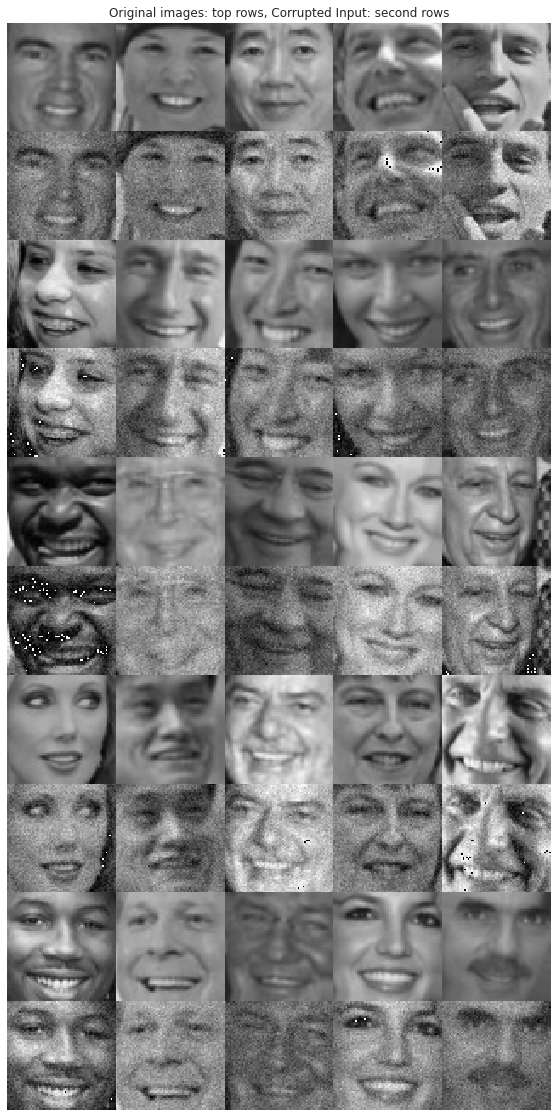

In [1295]:
# Display the 1st 5 original and corrupted
image_size = 64
rows, cols = 5, 5
num = rows * cols
imgs = np.concatenate([x_pos_train[:num], x_pos_train_noisy[:num]])
imgs = imgs.reshape((rows * 2, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 2, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: second rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

### Question 3.ii) Build the Model


#### Question 3.ii.a) Build an Encoder Model
Above are the images before and after being corrupted. Now we will build the autoencoder. Build the Encoder with the following requirements:
<ul>
<li>Input Layer shape of size (64,64,1)</li>
<li>Latent_dimension of 16</li>
<li>Use two CNN layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 dense layer of size Latent_dimension</li>
</ul>

Your model should have an input size of (64,64,1) and an output size of (None,16).

** hint: hint: refer to the last class exercise on autocoders.

In [1296]:
# Build the encoder architecture here
# YOUR CODE HERE 
input_shape = (64, 64, 1)
batch_size =25
kernel_size = 3
latent_dim = 16
layer_filters = [32, 64]

inputs = Input(shape=input_shape, name='encoder_input')
x = inputs


for filters in layer_filters:
    x = Conv2D(filters=filters,
               padding='same',
               kernel_size=kernel_size,
               activation='relu',
               strides=2,)(x)
   # x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization()(x)

shape = K.int_shape(x)

x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

In [1297]:
# Print model summary
encoder = Model(inputs, latent, name='encoder')
encoder.summary()
# YOUR CODE HERE

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_199 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_200 (Bat (None, 16, 16, 64)        256       
_________________________________________________________________
flatten_41 (Flatten)         (None, 16384)             0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                2621

#### 3.ii.b) Build an Dencoder Model
Next we will build the decoder model. This model should have
<ul>
<li>Input Layer shape of size (latent_dimension,)</li>
<li>1 dense layer with the size of 16*16*64</li>
<li>Two transposed convolution layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 conv2dTranspose layer with 1 filter and kernel size of 3</li>
<li>1 Output layer with sigmoid activation</li>
</ul>

In [1298]:
# Build the decoder architecture here
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)


for filter in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filter,
                        kernel_size=kernel_size,
                        padding = 'same',
                        strides = 2,
                        activation='relu')(x)
    x = BatchNormalization()(x)

x = Conv2DTranspose(filters=1,
                    padding = 'same',
                    kernel_size= kernel_size)(x)

outputs = Activation('sigmoid', name='decoder_output')(x)
# YOUR CODE HERE

#### Question 3.ii.c) Build Encoder + Dencoder Model
Now combine encoder and decoder models and build the autoencoder architecture.

In [1299]:
# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
# Print Model Summary

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
# YOUR CODE HERE
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 16)                0         
_________________________________________________________________
dense_83 (Dense)             (None, 16384)             278528    
_________________________________________________________________
reshape_41 (Reshape)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_transpose_140 (Conv2D (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_201 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_transpose_141 (Conv2D (None, 64, 64, 32)        18464     
_________________________________________________________________
batch_normalization_202 (Bat (None, 64, 64, 32)        128 

Call compile using 'mse' loss with an optimizer (adam is probably the safest one to use). Call autocoder.fit with x = x_pos_train_noisy, y = x_pos_train, validation_data = (x_pos_test, x_pos_test_noisy). 

In [1300]:
# Compile
autoencoder.compile(loss='mse', optimizer= Adam())

# Train the autoencoder
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
autoencoder.fit(x_pos_train_noisy,
                x_pos_train,
                validation_data=(x_pos_test, x_pos_test_noisy),
                epochs=50,
                batch_size=batch_size,
                callbacks=[early_stopper])

Train on 2952 samples, validate on 738 samples
Epoch 1/50
2952/2952 [==============================] - 2s 703us/step - loss: 0.0153 - val_loss: 0.0317
Epoch 2/50
2952/2952 [==============================] - 2s 535us/step - loss: 0.0092 - val_loss: 0.0290
Epoch 3/50
2952/2952 [==============================] - 2s 538us/step - loss: 0.0080 - val_loss: 0.0202
Epoch 4/50
2952/2952 [==============================] - 2s 543us/step - loss: 0.0077 - val_loss: 0.0127
Epoch 5/50
2952/2952 [==============================] - 2s 541us/step - loss: 0.0074 - val_loss: 0.0109
Epoch 6/50
2952/2952 [==============================] - 2s 545us/step - loss: 0.0074 - val_loss: 0.0098
Epoch 7/50
2952/2952 [==============================] - 2s 550us/step - loss: 0.0072 - val_loss: 0.0097
Epoch 8/50
2952/2952 [==============================] - 2s 537us/step - loss: 0.0071 - val_loss: 0.0097
Epoch 9/50
2952/2952 [==============================] - 2s 542us/step - loss: 0.0071 - val_loss: 0.0096
Epoch 10/50
2952/

### Question 3.iii) Print denoised images (predictions)

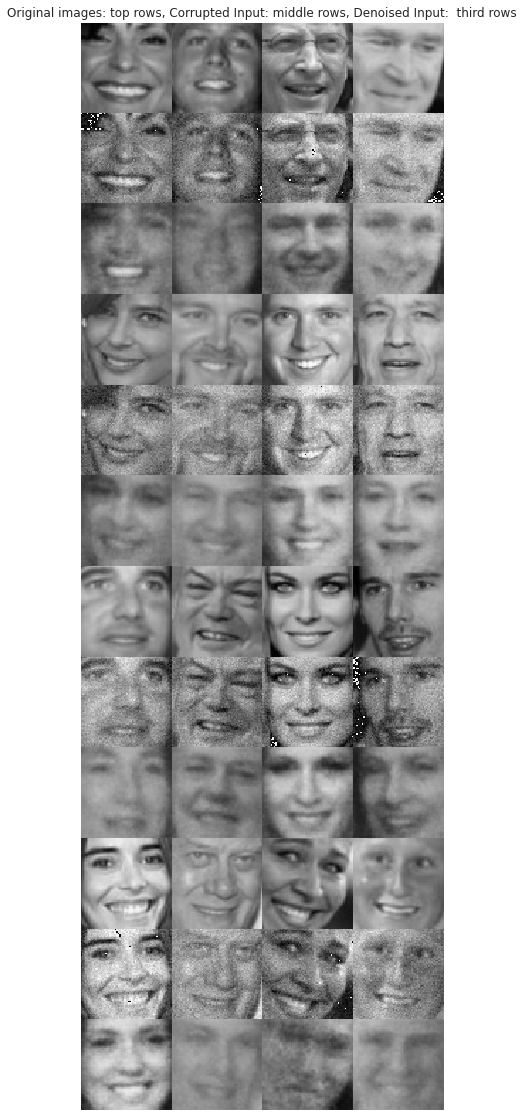

In [1301]:
# Predict the Autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_pos_test_noisy)
# Display the 1st 4 corrupted and denoised images
rows, cols = 4, 4
num = rows * cols
imgs = np.concatenate([x_pos_test[:num], x_pos_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

Comment on how your model has performed. Was your model able to denoise the image successfully? Is there anything unexpected results about the images? MSE error is known to smooth an image too much, did your model suffere the same result?

The model was able to succefully denoise the images. However the model did smooth the image too much so it appears blurry. In some of the images the model would also treat glasses and eye pupils as noise and those features would not be reproducted in the results. I made many attempts to fix this flaw, namely changing loss functions to binary_crossentropy and trying all types of optimizers. I also decided to add a convolutional layer with 16 filters but I cannot tell if this helps my probelms or not. An intersenting note is that adding regularization did not improve the accuracy of my model, however, decreasing the batch size helped reduce blurriness. An unexpected result occurred when 2 large, dark plots of noise were interpreted as sunglasses in one of the images. 